# feature selection - PIMP
* Permutation Importance (순열 중요도) : 데이터 쌓이는 순서가 중요함.
* 데이터가 저장된 순서의 중요도를 이용해 원본 데이터였을 때와 데이터의 순서를 섞었을 때의 차이점을 이용해 변수를 선택하는 방법
* 순서 있는 데이터와 suffle한 데이터를 비교함. 0.9, 0.5 차이면 데이터는 의미가 없다고 판단함. 주식의 시간 정보를 없애면 가격은 의미 없음

#### 접근법
* MCR 접근법
* PIPM 접근법

#### MCR 접근법
- ref: Fisher (2019) , All Models are Wrong, but many are useful

#### 프로세스
1. 학습이 끝난 모델(f), feature 데이터셋(X), Label 데이터(y), 평가지표 준비
2. f에 대하여 f(X, y) 적용해서 학습후 평가지표 점수 확인(S)
3. feature 하나하나에 대하여 아래 내용 바복
   1) X에 대하여 j 번째 feature를 선택하고, 이 feature 안의 데이터를 무작위로 섞음(Xj)
   2) ( $X_j$ , y) 모델학습 및 평가지표 도출($S_j$)
   3) n회 반복 -> 5번 반복시 $S_j$1, $S_j$2, $S_j$3, $S_j$4, ... $S_j$n
   4) $S_j$n 들을 모아서 S와 비교 확인

#### 프로세스 결과 해석
* $S_j$와 S의 평가지표 점수 차이를 이용해 $_j$번째 feature의 평가 지표 하락에 기여한 정도를 파악
* $_j$ 번째 feature의 순서를 섞으면 label y와 feature $_j$ 사이의 패턴이 끊어지므로 정보가 손실됨
* 정보가 손실된 정도를 평가지표 하락으로 측정하고자 함.

In [1]:
import pandas as pd

df = pd.read_csv('test1_modify7.csv')

df.columns

Index(['year', 'month', 'hour', 'dayofweek', 'windforce', 'wind_chill',
       'discomfort', 'heat_stroke', 'regular', 'casual', 'group'],
      dtype='object')

In [2]:
df

,year,month,hour,dayofweek,windforce,wind_chill,discomfort,heat_stroke,regular,casual,group
0,2021,1,0,4,0,1,0,0,298,74.0,1.0
1,2021,1,1,4,0,1,0,0,249,66.0,1.0
2,2021,1,2,4,0,1,0,0,193,53.0,0.0
3,2021,1,3,4,0,1,0,0,153,33.0,2.0
4,2021,1,4,4,0,1,0,0,114,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36866,2024,12,19,1,0,0,0,0,3062,424.0,0.0
36867,2024,12,20,1,0,0,0,0,2368,316.0,0.0
36868,2024,12,21,1,0,0,0,0,2035,292.0,0.0
36869,2024,12,22,1,0,0,0,0,1760,288.0,0.0


In [3]:
feature = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke', 'wind_chill']
label = 'regular'
X, y = df[feature], df[label]

In [4]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
model.score(X, y)

# S 확인

0.869831993956445

In [5]:
X, y = df[feature], df[label]
model = RandomForestRegressor()
model.fit(X, y)
model.score(X, y)

# Sj확인

0.8696827276209251

In [6]:
pd.options.mode.copy_on_write = True

In [7]:
import  numpy as np
df = pd.read_csv('test1_modify7.csv')

feature = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke', 'wind_chill']
label = 'regular'

shuffle = df['hour']
np.random.shuffle(shuffle)
df['hour'] = shuffle
df.head()

C:\Users\asia\AppData\Local\Temp\ipykernel_8168\666875961.py:8: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(shuffle)


,year,month,hour,dayofweek,windforce,wind_chill,discomfort,heat_stroke,regular,casual,group
0,2021,1,0,4,0,1,0,0,298,74.0,1.0
1,2021,1,16,4,0,1,0,0,249,66.0,1.0
2,2021,1,22,4,0,1,0,0,193,53.0,0.0
3,2021,1,11,4,0,1,0,0,153,33.0,2.0
4,2021,1,15,4,0,1,0,0,114,26.0,0.0


In [8]:
X, y = df[feature], df[label]

model = RandomForestRegressor()
model.fit(X, y)
model.score(X, y)

0.49501414242725283

In [9]:
import  numpy as np
df = pd.read_csv('test1_modify7.csv')

feature = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke']
label = 'regular'

shuffle = df['year']
np.random.shuffle(shuffle)
df['year'] = shuffle
df.head()

C:\Users\asia\AppData\Local\Temp\ipykernel_8168\3283205703.py:8: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(shuffle)


,year,month,hour,dayofweek,windforce,wind_chill,discomfort,heat_stroke,regular,casual,group
0,2021,1,0,4,0,1,0,0,298,74.0,1.0
1,2024,1,1,4,0,1,0,0,249,66.0,1.0
2,2024,1,2,4,0,1,0,0,193,53.0,0.0
3,2024,1,3,4,0,1,0,0,153,33.0,2.0
4,2022,1,4,4,0,1,0,0,114,26.0,0.0


In [10]:
X, y = df[feature], df[label]

model = RandomForestRegressor()
model.fit(X, y)
model.score(X, y)

0.8034139027540553

In [11]:
from sklearn.inspection import permutation_importance as pi

df = pd.read_csv('test1_modify7.csv')

feature = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke']
label = 'regular'

X, y = df[feature], df[label]

model = RandomForestRegressor()
model.fit(X, y)          # return Dictionary-like object,

RandomForestRegressor()

In [15]:
result['importances']

array([[0.27330536, 0.27779137, 0.28288152, 0.27633281, 0.27433427],
       [0.49519958, 0.50048665, 0.49460543, 0.49358585, 0.49376925],
       [1.23468528, 1.23350503, 1.24660024, 1.25405841, 1.24969189],
       [0.37371945, 0.36568395, 0.36416318, 0.36114854, 0.35845625],
       [0.00647533, 0.00604262, 0.00622164, 0.00641074, 0.00538765],
       [0.08783291, 0.08710697, 0.08849357, 0.08739667, 0.09100559],
       [0.07246221, 0.07443668, 0.07416493, 0.07497407, 0.07741785]])

In [16]:
pd.DataFrame(result['importances'])

,0,1,2,3,4
0,0.273305,0.277791,0.282882,0.276333,0.274334
1,0.495200,0.500487,0.494605,0.493586,0.493769
2,1.234685,1.233505,1.246600,1.254058,1.249692
3,0.373719,0.365684,0.364163,0.361149,0.358456
4,0.006475,0.006043,0.006222,0.006411,0.005388
5,0.087833,0.087107,0.088494,0.087397,0.091006
6,0.072462,0.074437,0.074165,0.074974,0.077418


In [17]:
perm_df = pd.DataFrame(result['importances']).T
perm_df.columns = feature
perm_df

# year, hour는 다른 column 대비 점수폭이 큼 > 중요하다고 판단

,year,month,hour,dayofweek,windforce,discomfort,heat_stroke
0,0.273305,0.495200,1.234685,0.373719,0.006475,0.087833,0.072462
1,0.277791,0.500487,1.233505,0.365684,0.006043,0.087107,0.074437
2,0.282882,0.494605,1.246600,0.364163,0.006222,0.088494,0.074165
3,0.276333,0.493586,1.254058,0.361149,0.006411,0.087397,0.074974
4,0.274334,0.493769,1.249692,0.358456,0.005388,0.091006,0.077418


In [18]:
perm_df.describe()

,year,month,hour,dayofweek,windforce,discomfort,heat_stroke
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.276929,0.495529,1.243708,0.364634,0.006108,0.088367,0.074691
std,0.003755,0.002847,0.009176,0.005792,0.000437,0.001565,0.001791
min,0.273305,0.493586,1.233505,0.358456,0.005388,0.087107,0.072462
25%,0.274334,0.493769,1.234685,0.361149,0.006043,0.087397,0.074165
50%,0.276333,0.494605,1.246600,0.364163,0.006222,0.087833,0.074437
75%,0.277791,0.495200,1.249692,0.365684,0.006411,0.088494,0.074974
max,0.282882,0.500487,1.254058,0.373719,0.006475,0.091006,0.077418


In [19]:
import seaborn as sns

<Axes: xlabel='mean', ylabel='std'>

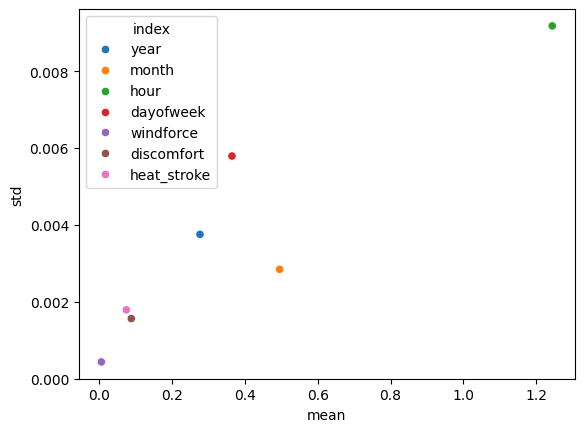

In [20]:
interested = ['mean', 'std']
for_plot = perm_df.describe().T[interested].reset_index()
sns.scatterplot(data=for_plot, x='mean', y='std', hue='index')

#### PIMP 접근법
- ref: A Altman (2010), Permutation Importance
- embed 방식에서 중요도 정보를 응용  # tree
- MCR : 평가 지표, PIMP: 변수의 중요도

#### PIMP 프로세스
1. 원본 데이터 셋 X, y에 대하여 학습하여 변수 중요도 신출(P)
2. y의 순서를 썩음(y$_j$) - y를 섞으면 틀린 정답지를 가지고 학습하게 됨
3. 수정한 데이터 셋(X, y$_j$)에 대해 학습하고 변수 중요도 산출(p$_j$)
4. 2~3 단계를 n회 반복 - n개의 P$_j$에 대해 랜덤 프로세스이므로  정규 분포를 이룸
5. P가 p$_j$의 정규 분포상 평균으로부터 몇 표준 편차 떨어졌는가를 파악하여 멀리 떨어져 있는 값은 의미 정삭적으로 분석할 때 의미있는 값이다

- 무의미한 수치의 분포란에 있으면 아주 무의미한 수치인데, 우너본 데이터를 가지고 뽑아낸 Feature_importnances가 무의미한 수치의 분포로 부터 떨러져 있으며, 무의미한 분포 기준으로 보았을때 아주 일어나기 힘든 상황이므로 아주 유의미 하다는 개념

In [21]:
df = pd.read_csv('test1_modify7.csv')

df.columns

Index(['year', 'month', 'hour', 'dayofweek', 'windforce', 'wind_chill',
       'discomfort', 'heat_stroke', 'regular', 'casual', 'group'],
      dtype='object')

In [22]:
feature = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke']
label = 'regular'

In [23]:
X, y = df[feature], df[label]

model = RandomForestRegressor()
model.fit(X, y)  

RandomForestRegressor()

In [24]:
# PIMP Process 1.

fi = pd.DataFrame()
fi['importance'] = model.feature_importances_
fi['feature'] = feature
fi

,importance,feature
0,0.089776,year
1,0.193301,month
2,0.571862,hour
3,0.100963,dayofweek
4,0.005627,windforce
5,0.016445,discomfort
6,0.022026,heat_stroke


In [25]:
# PIMP Process 2. y 값 섞음

yj = pd.read_csv('test1_modify7.csv')[label]
np.random.shuffle(yj)
yj

C:\Users\asia\AppData\Local\Temp\ipykernel_8168\1443673086.py:4: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(yj)


0        4403
1        5287
2        3734
3         166
4        6694
         ... 
36866    4297
36867    6106
36868     266
36869    6529
36870    1424
Name: regular, Length: 36871, dtype: int64

In [26]:
# PIMP Process 3.

model = RandomForestRegressor()
model.fit(X, yj)  # y 가 아니라 yj(틀린 정답지)로 학습
model.feature_importances_   # pj 산출

array([0.11109435, 0.23895461, 0.34622907, 0.20977111, 0.00906762,
       0.04174084, 0.04314239])

In [27]:
import warnings
warnings.simplefilter(action='ignore')

In [28]:
# PIMP Process 4.

yj = pd.read_csv('test1_modify7.csv')[label]
null_imp_df = pd.DataFrame()

for i in range(20):
    np.random.shuffle(yj)
    model = RandomForestRegressor()
    model.fit(X, yj)  # y 가 아니라 yj(틀린 정답지)로 학습
    null_imp_df[str(i) + '_shuffle'] = model.feature_importances_   # pj 산출

null_imp_df

,0_shuffle,1_shuffle,2_shuffle,3_shuffle,4_shuffle,5_shuffle,6_shuffle,7_shuffle,8_shuffle,9_shuffle,10_shuffle,11_shuffle,12_shuffle,13_shuffle,14_shuffle,15_shuffle,16_shuffle,17_shuffle,18_shuffle,19_shuffle
0,0.157729,0.158596,0.170899,0.172138,0.151116,0.139750,0.131643,0.160207,0.164974,0.174380,0.155076,0.160530,0.154931,0.123662,0.151613,0.174083,0.168258,0.163625,0.161075,0.171769
1,0.227028,0.238092,0.245434,0.196732,0.254470,0.228717,0.223882,0.232613,0.223488,0.220660,0.234126,0.212984,0.242649,0.243810,0.226188,0.205581,0.246275,0.248004,0.238587,0.233731
2,0.326663,0.302460,0.297227,0.312886,0.311696,0.327699,0.334515,0.316753,0.308711,0.298390,0.326820,0.314931,0.308420,0.335594,0.317519,0.326208,0.275127,0.320787,0.296277,0.303757
3,0.196316,0.209890,0.193196,0.225869,0.191369,0.218142,0.216788,0.211172,0.217083,0.219683,0.204814,0.217434,0.206485,0.221056,0.214336,0.212689,0.216379,0.175379,0.217409,0.198177
4,0.011686,0.013207,0.012701,0.014156,0.009908,0.010112,0.012729,0.007425,0.013105,0.012553,0.004114,0.014135,0.009558,0.013201,0.012365,0.011687,0.013185,0.007528,0.012511,0.013185
5,0.036731,0.036503,0.039092,0.039127,0.041799,0.035456,0.038916,0.037365,0.036941,0.040198,0.035370,0.038254,0.037834,0.029851,0.036195,0.030678,0.039649,0.044086,0.037488,0.039317
6,0.043847,0.041252,0.041451,0.039092,0.039642,0.040123,0.041527,0.034464,0.035698,0.034137,0.039681,0.041732,0.040122,0.032827,0.041783,0.039074,0.041126,0.040590,0.036654,0.040064


In [29]:
nulls = null_imp_df.T
nulls.columns = feature
nulls

,year,month,hour,dayofweek,windforce,discomfort,heat_stroke
0_shuffle,0.157729,0.227028,0.326663,0.196316,0.011686,0.036731,0.043847
1_shuffle,0.158596,0.238092,0.302460,0.209890,0.013207,0.036503,0.041252
2_shuffle,0.170899,0.245434,0.297227,0.193196,0.012701,0.039092,0.041451
3_shuffle,0.172138,0.196732,0.312886,0.225869,0.014156,0.039127,0.039092
4_shuffle,0.151116,0.254470,0.311696,0.191369,0.009908,0.041799,0.039642
5_shuffle,0.139750,0.228717,0.327699,0.218142,0.010112,0.035456,0.040123
6_shuffle,0.131643,0.223882,0.334515,0.216788,0.012729,0.038916,0.041527
7_shuffle,0.160207,0.232613,0.316753,0.211172,0.007425,0.037365,0.034464
8_shuffle,0.164974,0.223488,0.308711,0.217083,0.013105,0.036941,0.035698
9_shuffle,0.174380,0.220660,0.298390,0.219683,0.012553,0.040198,0.034137


<Axes: >

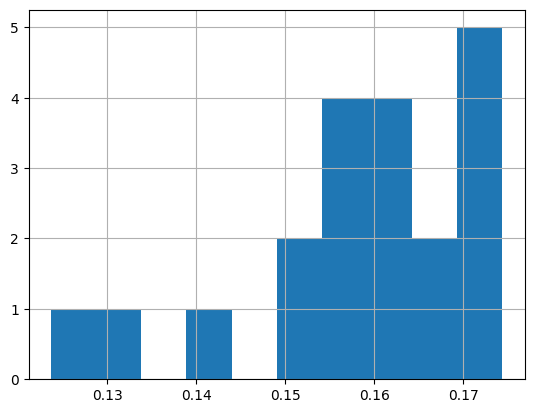

In [30]:
nulls['year'].hist()

# 현재는 데이터가 작아서 데이터 분포가 고르게 분포되지 않음
# 반복 횟수가 많으면 고르게 분포되는  형태를 나타낼 것임. 

In [31]:
# PIMP Process 5. 

interested = ['mean', 'std']
nulls2 = nulls.describe().T[interested].reset_index()

nulls2['P'] = fi['importance']   # 변수 중요도 P

# 원본 P가 평균으로부터 몇 표준편차 떨저져있는지 확인
nulls2['P_dist'] = (nulls2['P'] - nulls2['mean']) / nulls2['std']
nulls2

,index,mean,std,P,P_dist
0,year,0.158303,0.013766,0.089776,-4.977936
1,month,0.231153,0.014711,0.193301,-2.573021
2,hour,0.313122,0.014963,0.571862,17.291817
3,dayofweek,0.209183,0.012544,0.100963,-8.627308
4,windforce,0.011453,0.002607,0.005627,-2.234848
5,discomfort,0.037543,0.003263,0.016445,-6.466243
6,heat_stroke,0.039244,0.002950,0.022026,-5.837110


PIMP( Permutation Importance for Machine learning Pipelines)은 머신러닝에서 피처 중요도를 평가하는 기법입니다. 이 접근법은 모델이 특정 피처(feature, 변수)의 중요성을 추정하는 데 도움을 주며, 모델이 각 피처에 얼마나 의존하는지 알아볼 수 있습니다. PIMP는 주로 회귀나 분류 문제에서 유용하며, 모델의 해석 가능성을 높이는 데 중요한 역할을 합니다.

# PIMP의 개요:
PIMP는 머신러닝 모델에서 각 피처의 중요도를 무작위로 값들을 섞은 후 그 피처가 모델 예측에 미치는 영향을 평가하는 방식입니다. PIMP는 Permutation Feature Importance(변수 순열 중요도) 방식에서 발전된 개념으로, 다음과 같은 특징이 있습니다:

 1. 피처 중요도의 추정: 모델의 성능이 특정 피처의 변화에 얼마나 민감한지를 측정하여 피처의 중요도를 계산합니다. 성능 저하가 클수록 해당 피처의 중요도가 높다고 판단합니다.

 2. 순열(permutation) 방식: 각 피처의 값을 무작위로 섞은 후 모델이 얼마나 성능 저하를 겪는지 측정합니다. 이를 여러 번 반복하여 피처가 모델 예측에 미치는 영향을 평가합니다.

 3. 모델과 데이터셋에 독립적: PIMP는 특정 모델에 종속적이지 않으며, 모든 머신러닝 모델에서 적용할 수 있습니다. 랜덤 포레스트, 그레디언트 부스팅, 신경망 등 다양한 모델에서 사용 가능합니다.

# PIMP 알고리즘의 작동 방식:
 1. 기준 성능 계산:
    * 모델을 훈련하고, 검증 데이터 또는 테스트 데이터를 통해 기본 성능(예: 정확도, RMSE 등)을 측정합니다. 이는 피처 중요도를 평가할 때 비교할 기준이 됩니다.

 2. 각 피처에 대해 순열 수행:
    * 각 피처에 대해 그 피처의 값을 무작위로 섞습니다. 이때 다른 피처들은 그대로 둔 상태로 모델의 예측 성능을 다시 계산합니다. 이를 통해 피처가 모델에 얼마나 기여했는지를 평가할 수 있습니다.

 3. 성능 저하 계산:
    * 무작위로 섞인 피처를 사용한 성능과 원래 피처를 사용한 성능을 비교하여, 성능 저하가 발생한 정도를 계산합니다. 성능 저하가 클수록 해당 피처의 중요도는 높다고 평가합니다.

 4. 순열을 여러 번 반복:
    * 순열 과정을 여러 번 반복하여 중요도의 안정성을 높이고, 피처 중요도를 평균적으로 평가합니다. 반복 횟수가 많을수록 더 신뢰할 수 있는 중요도 추정이 가능합니다.

 5. 피처 중요도 정렬:
    * 모든 피처의 순열에 따른 성능 저하를 평가한 후, 성능 저하가 가장 큰 피처부터 작은 피처 순으로 중요도를 정렬합니다.

# PIMP의 주요 장점:
 1. 해석 가능성:
    * PIMP는 블랙박스 모델의 해석 가능성을 높입니다. 복잡한 머신러닝 모델에서도 어떤 피처가 중요한지 직관적으로 이해할 수 있게 도와줍니다.

 2. 비교적 간단한 구현: 
    * PIMP는 모델 구조에 크게 의존하지 않고, 순열과 성능 측정만으로 피처의 중요도를 계산할 수 있습니다. 이는 모델 종류와 관계없이 유연하게 적용할 수 있음을 의미합니다.

 3. 모든 피처 유형에서 사용 가능:
    * 연속형, 범주형 등 모든 유형의 피처에서 사용할 수 있으며, 데이터 전처리 없이 적용 가능합니다.

 4. 피처 상관관계 처리 가능:
    * PIMP는 피처 간 상관관계에 민감하게 반응하지 않으며, 상관관계가 높은 피처 간의 중요도 차이를 쉽게 평가할 수 있습니다.

# PIMP의 단점 및 고려사항:

 1. 계산 비용이 높음:
    * 순열을 여러 번 수행하고, 매번 모델을 평가해야 하므로 계산 비용이 높습니다. 특히 대규모 데이터셋이나 복잡한 모델에서 시간이 오래 걸릴 수 있습니다.

 2. 훈련 데이터에서 과적합된 모델은 신뢰성이 떨어짐:
    * PIMP는 검증 데이터 또는 테스트 데이터에서 수행해야 신뢰할 수 있습니다. 훈련 데이터에 과적합된 모델에서 PIMP를 수행할 경우, 과도하게 편향된 중요도를 얻을 수 있습니다.

 3. 상관관계가 높은 피처에 취약:
    * 상관관계가 높은 피처들은 서로 대체 가능한 경우가 많아, 중요도를 낮게 평가할 가능성이 있습니다. 이러한 경우 별도의 피처 엔지니어링이 필요할 수 있습니다.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 데이터 생성
X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 피처 중요도 평가 (PIMP 방식)
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# 결과 출력
print("mean 피처 중요도:")
for i, v in enumerate(perm_importance.importances_mean):
    print(f"Feature {i}: {v:.3f}")


mean 피처 중요도:
Feature 0: 0.038
Feature 1: 0.514
Feature 2: 0.047
Feature 3: 0.006
Feature 4: 0.003
Feature 5: 0.305
Feature 6: 0.049
Feature 7: 0.005
Feature 8: 0.006
Feature 9: 0.611


In [33]:
print("std 피처 중요도:")
for i, v in enumerate(perm_importance.importances_std):
    print(f"Feature {i}: {v:.3f}")

std 피처 중요도:
Feature 0: 0.010
Feature 1: 0.017
Feature 2: 0.008
Feature 3: 0.002
Feature 4: 0.001
Feature 5: 0.024
Feature 6: 0.005
Feature 7: 0.002
Feature 8: 0.001
Feature 9: 0.053


#### XAI(Explainable AI)
- 속도, 정확도, 해석력
- 전역(global) 해석력, 지역(local) 해석력

#### XAI 알고리즘
- PDP(부분 의존도)
- SHAP

In [34]:
df = pd.read_csv('test1_modify7.csv')

df.columns

Index(['year', 'month', 'hour', 'dayofweek', 'windforce', 'wind_chill',
       'discomfort', 'heat_stroke', 'regular', 'casual', 'group'],
      dtype='object')

In [35]:
feature = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke']
label = 'regular'

X, y = df[feature], df[label]

model = RandomForestRegressor()
model.fit(X, y) 

RandomForestRegressor()

<Axes: xlabel='hour', ylabel='regular'>

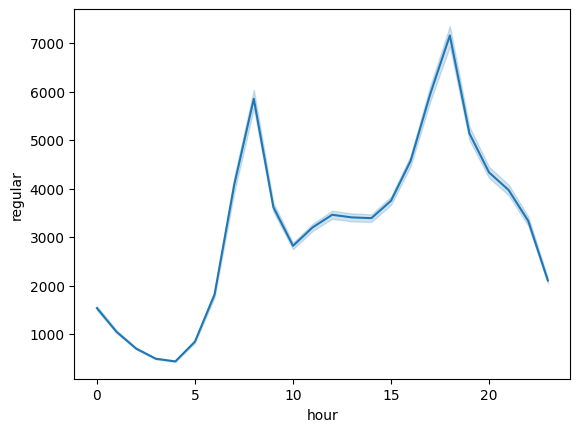

In [36]:
# 시각화 예시

sns.lineplot(data=df, x='hour', y='regular')

In [37]:
# feature - label의 관게를 이해라기 위해 label을  직접 입력함
# PDP는 label을 입력하지 않고 모델의 예측 값을 이용

In [38]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay as pdp

#### PDP(Partial Denpendence Plot: 부분 의존도)
- feature의 수치를 선형적으로 변형하면서 알고리즘 해석 능력이 얼마나 증감하는지 관찰하는 방식
- Xhao et el(2019) - Casual Interpretation of black-bok models
- Wright et el - Interpreting black box machine learning model ~ SAS institute
- Glodstein et el(2015) - Peeking inside the Black Box

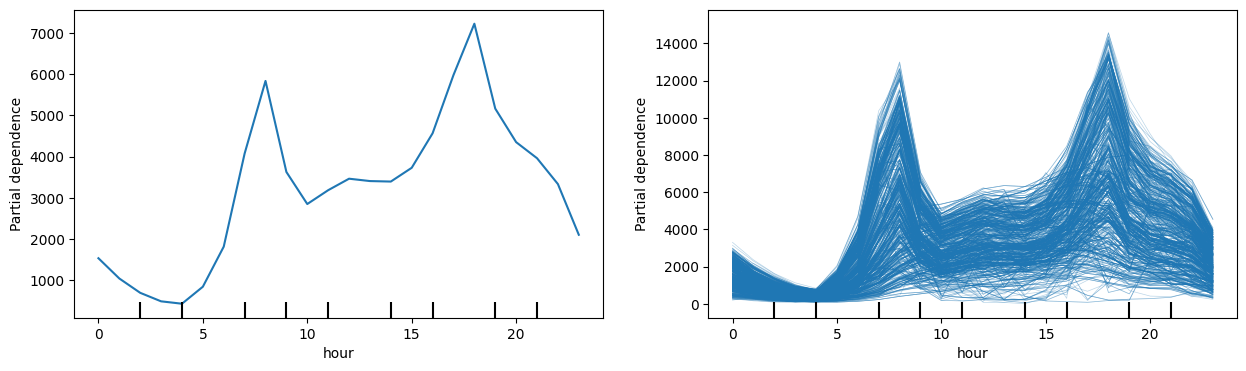

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15, 4)

pdp.from_estimator(model, X, ['hour'], kind='average', ax=ax1)      # PDP
pdp.from_estimator(model, X, ['hour'], kind='individual', ax=ax2)   # ICE = individual conditional Expectations

#### PDP, ICE 해석
- ICE(individual Conditional Expectations, 개별 조건부 기대치)
- ICE를 평균낸 것이 PDP
- 한 row에 대해서 특정 column(hour)를 기준으로 해당 column을 변경하면서 예측 모델의 결과를 도출
  - 한 row에서 특정 column의 값만 변경하면서 에측값을 여러개 도출 
  - 이 그래프를 따로 따로 본것이 ICE 이고, 그것들의 평균이 PDP 임

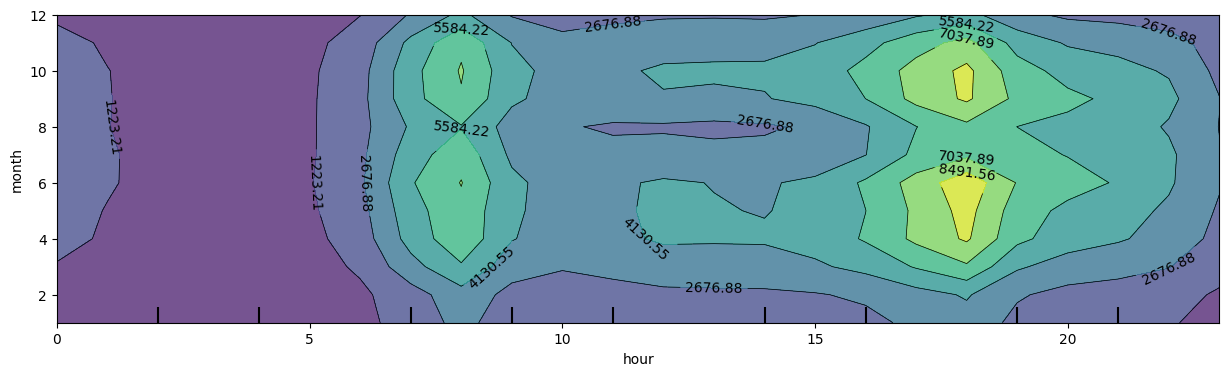

In [40]:
#### One-Way 예시

fig, ax1 = plt.subplots()
fig.set_size_inches(15, 4)

target = ('hour', 'month')

pdp.from_estimator(model, X, [target], kind='average', ax=ax1)

# 실측값으로 그림 그래프가 아닌 모델의 알고리즘의 예측값으로 그린 것
# 알고리즘이 어떤 featue에 대해서 이런 결고를 내는 경향이 있다는 것을 파악하기 위함.

#### SHAP 
- shapley value
- 축구 선수의 경우 매 경기가 끝날때마다 개인의 기여도를 평가 하는데 이 기여도를 수치화 한것
- ref: Shapley(1953), lundberg(2017)

#### SHAP 프로세스
1. 학습이 끝난 모델(f)과 해석할 row(i)를 준비
2. 데이터셋(feature로만 이루어짐)으로부터 랜덤하 row(z)를 선택
3. 두 row인 i와 z를 f에 넣고 예측값 확인
4. shapley value를 알아볼 column(j)의 값을 i와 z를 맞 교환
5. 4에서 맞 교환한 i와 z를 f에 넣고 예측값 확인
6. i에서 j의 값을 비교(원본 예측값 vs i와 z를 맞 교환 했을때 예측값)
7. z에서 j의 값을 비교(원본 예측값 vs z와 i를 맞 교환 했을때 예측값)
8. 2~7 단계를 n번 반복하여 i의 j 값이 원본일 때와 아닐 때를 비교
9. 8에서 비교할때 비교한 값들을 평균내면 원본이었을때가 그렇지 않았을 때 대비 평균적으로 + 또는 - 방향으로 얼마나 기여했는지 수치로 보여줌 -> shapley value

In [41]:
import shap

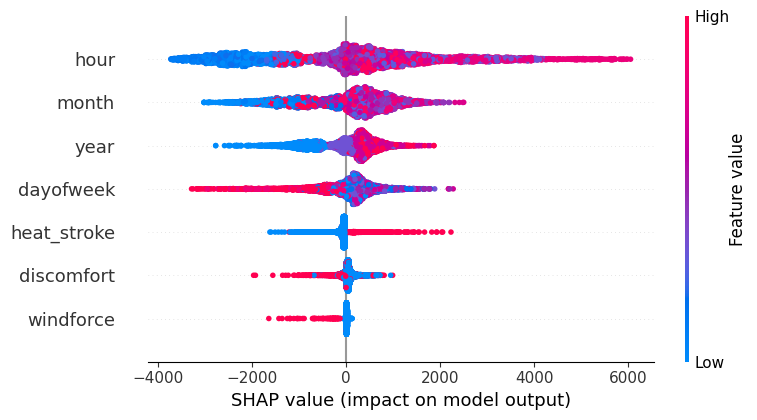

In [42]:
shap.initjs()
shap_values = shap.TreeExplainer(model).shap_values(X[::5])
shap.summary_plot(shap_values, X[::5])

In [43]:
shap.initjs()

single_row = X.iloc[1000]
single_row

year           2021
month             2
hour             15
dayofweek         1
windforce         0
discomfort        0
heat_stroke       0
Name: 1000, dtype: int64

In [44]:
explainer = shap.TreeExplainer(model)
single_val = explainer.shap_values(single_row)
shap.force_plot(explainer.expected_value,single_val, single_row)

In [45]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [47]:
import matplotlib.pyplot as plt
import shap
import xgboost
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
# Load the dataset (Boston housing prices)
# X, y = load_boston(return_X_y=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a sample model using XGBoost
model = xgboost.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

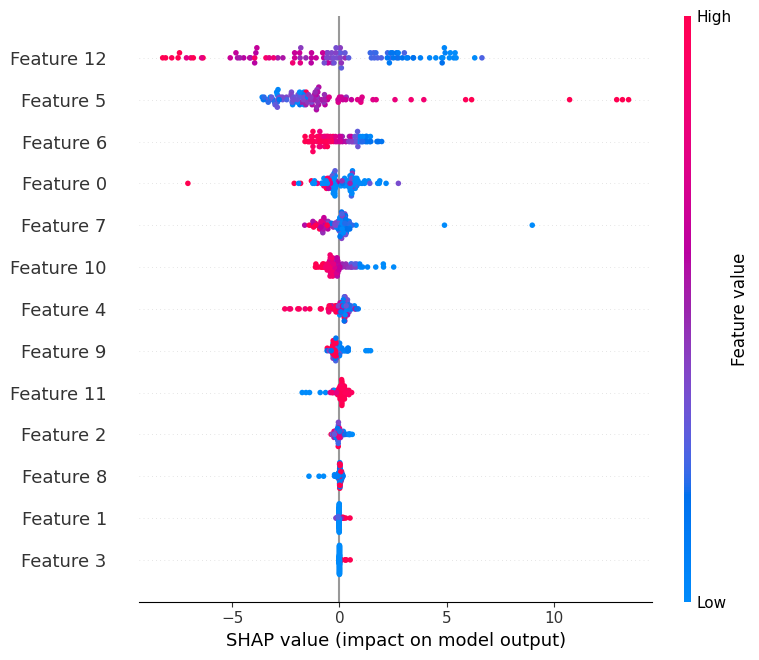

In [48]:
# 1. Summary Plot
shap.summary_plot(shap_values, X_test)

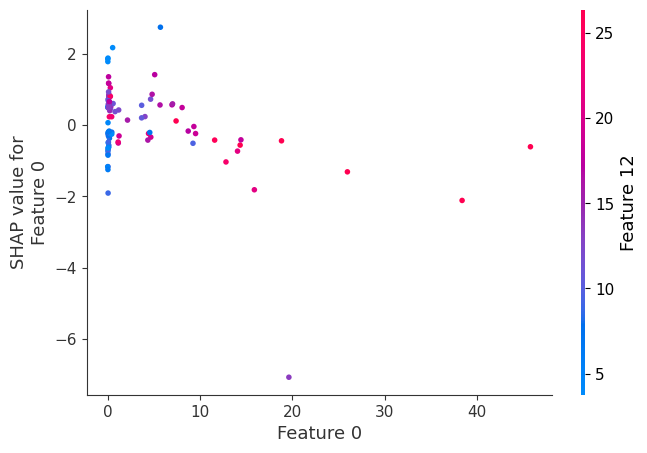

In [49]:
# 2. Dependence Plot (for the first feature)
shap.dependence_plot(0, shap_values.values, X_test)

In [50]:
# 3. Force Plot (for the first prediction)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test[0])

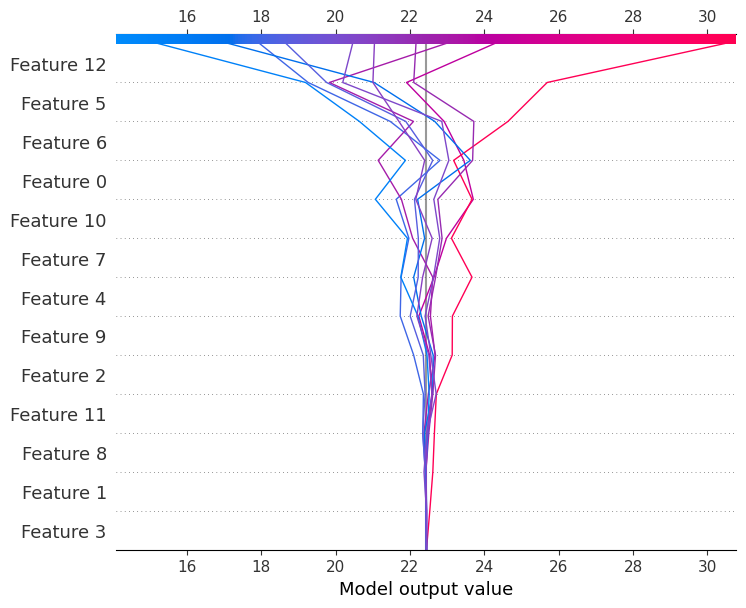

In [52]:
# 4. Decision Plot
shap.decision_plot(explainer.expected_value, shap_values.values[0:10], X_test[0:10])  # 10개 항목에 대해서만

#### Bagging

In [97]:
from sklearn.tree import DecisionTreeRegressor as dt

# systematic sampling

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[feature], train[label]
X_test, y_test = test[feature], test[label]

In [99]:
sampler = [1, 12000, 8000, 678]
train.iloc[sampler]

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,regular,casual,group
1,2,2021,1,2,4,0,0,0,193,53.0,0.0
12000,24000,2023,8,15,2,0,2,2,4800,864.0,0.0
8000,16000,2022,9,6,1,0,0,0,3565,219.0,4.0
678,1356,2021,2,14,1,0,0,0,1690,490.0,9.0


In [101]:
sample_ls = []
for i in range(5):
    sample_ls.append(i)
sample_ls

[0, 1, 2, 3, 4]

In [102]:

sample_ls = [ i for i in range(5)]
sample_ls

[0, 1, 2, 3, 4]

In [104]:
from random import randint
sample_ls = [ randint(0,5) for i in range(5)]
sample_ls

[4, 3, 4, 0, 5]

In [105]:
train.tail()

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,regular,casual,group
13812,27624,2023,12,16,6,0,0,0,2200,462.0,0.0
13813,27626,2023,12,18,6,0,0,0,1987,370.0,0.0
13814,27628,2023,12,20,6,0,0,0,1337,288.0,0.0
13815,27630,2023,12,22,6,0,0,0,1142,247.0,0.0
13816,27632,2023,12,23,6,0,0,0,914,275.0,0.0


In [108]:
len(train)

13817

In [109]:
# list comprehension  - python에서 list를 효율적으로 사용하려면
sampler = [ randint(0, len(train) -1) for i in range(len(train))]
train.iloc[sampler]

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,regular,casual,group
13517,27034,2023,12,16,4,0,0,0,6057,1102.0,0.0
275,550,2021,1,9,5,0,0,0,1072,190.0,6.0
2759,5518,2021,8,10,6,0,1,1,2043,451.0,15.0
7332,14664,2022,8,14,5,0,2,2,4126,927.0,34.0
391,782,2021,2,9,0,0,0,0,1392,137.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8871,17742,2022,12,5,6,0,0,0,315,38.0,0.0
4904,9808,2022,1,18,1,0,0,0,4990,585.0,8.0
8552,17104,2022,11,17,2,0,0,0,9148,1459.0,26.0
7321,14642,2022,8,16,4,0,2,2,5244,939.0,26.0


In [110]:
def bootstrap():
    sampler = [ randint(0, len(train) -1) for i in range(len(train))]
    return train.iloc[sampler]

In [111]:
bootstrap()

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,regular,casual,group
7016,14032,2022,7,11,2,0,1,0,111,9.0,0.0
7245,14490,2022,7,19,6,0,1,1,528,81.0,5.0
10388,20776,2023,4,15,3,0,0,0,2228,280.0,0.0
11327,22654,2023,6,13,1,0,0,0,2834,345.0,0.0
5781,11562,2022,4,11,2,0,0,0,3800,768.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
3490,6980,2021,10,0,1,0,1,0,922,299.0,3.0
13351,26702,2023,11,23,4,0,0,0,1878,222.0,0.0
12623,25246,2023,9,18,2,0,0,0,10589,2096.0,0.0
4164,8328,2021,11,0,6,0,0,0,1108,465.0,8.0


In [113]:
multi_df = [bootstrap() for i in range(100)]
len(multi_df)

100

In [114]:
multi_df[0]

,index,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,regular,casual,group
5735,11470,2022,4,15,5,0,0,0,4784,3517.0,189.0
8025,16050,2022,9,5,3,0,0,0,1404,118.0,4.0
729,1458,2021,2,20,5,0,0,0,1797,1160.0,35.0
12412,24824,2023,9,2,0,0,0,0,788,261.0,0.0
983,1966,2021,3,17,5,0,0,0,1842,493.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
958,1916,2021,3,21,3,0,0,0,3137,1047.0,18.0
8447,16894,2022,11,6,1,0,0,0,2954,121.0,0.0
544,1088,2021,2,1,5,0,0,0,235,139.0,4.0
3313,6626,2021,9,10,1,0,0,0,512,119.0,8.0


In [119]:
from sklearn.tree import DecisionTreeRegressor as dt
forest = []
for single in multi_df:
    X_single, y_single = single[feature], single[label]
    tree = dt()
    tree.fit(X_single, y_single)
    forest.append(tree)

len(forest)

100

In [122]:
forest[0].predict(X_test)

array([ 338. ,  109.5,  185.2, ..., 2595. , 2312. , 1675. ])

In [123]:
forest[10].predict(X_test)

array([ 135.66666667,  170.        ,  217.        , ..., 2595.        ,
       2312.        , 1036.        ])

In [125]:
opinions = pd.DataFrame()
n = 1
for single_tree in forest:
    opinions[str(n) + 'th_tree_say']  = single_tree.predict(X_test)
    n = n + 1

opinions.head()

,1th_tree_say,2th_tree_say,3th_tree_say,4th_tree_say,5th_tree_say,6th_tree_say,7th_tree_say,8th_tree_say,9th_tree_say,10th_tree_say,...,91th_tree_say,92th_tree_say,93th_tree_say,94th_tree_say,95th_tree_say,96th_tree_say,97th_tree_say,98th_tree_say,99th_tree_say,100th_tree_say
0,338.0,173.200000,294.5,251.200000,272.750000,214.0,294.50,251.250000,164.5,311.666667,...,164.666667,207.75,216.60,251.333333,216.40,251.25,135.666667,186.250000,309.000,289.777778
1,109.5,100.500000,161.0,109.500000,93.800000,49.0,158.00,105.000000,109.5,152.000000,...,152.000000,165.50,126.25,89.333333,49.00,49.00,156.500000,89.333333,127.000,49.000000
2,185.2,153.400000,149.0,163.333333,164.666667,216.0,98.75,153.800000,137.5,216.000000,...,188.333333,60.00,138.50,138.500000,176.25,60.00,137.500000,138.000000,217.000,164.000000
3,653.0,820.500000,1323.0,820.500000,318.000000,988.0,988.00,1323.000000,988.0,1323.000000,...,1323.000000,1323.00,820.50,1323.000000,820.50,1323.00,1323.000000,1323.000000,1294.375,822.000000
4,797.5,944.333333,325.0,325.000000,955.000000,595.0,955.00,1025.166667,325.0,1270.000000,...,955.000000,325.00,1570.75,640.000000,797.50,1270.00,325.000000,1270.000000,1270.000,325.000000


In [126]:
opinions.T.mean()

0         233.404896
1         120.853345
2         159.134643
3         897.934107
4         849.864929
            ...     
13811    3152.701591
13812    3341.797000
13813    2305.942286
13814    2072.779405
13815    1182.856167
Length: 13816, dtype: float64

In [127]:
y_test

0         249
1         153
2         118
3         362
4         429
         ... 
13811    1947
13812    2339
13813    1577
13814    1283
13815     914
Name: regular, Length: 13816, dtype: int64

#### MCOD(Monte Carlo Outlier Detection)
- 몬테카를로 방식의 이상치 탐지법  = 오치(틀린값)를 이용한 이상 탐지법
- ref: (2009) A new Strategy of Outlier Detection for QSAR/QSPR

In [130]:
error_forest = pd.DataFrame()
n = 1
for single_tree in forest:
    error = (y_test - single_tree.predict(X_test)) ** 2
    error_forest[str(n) + 'th_tree_error'] = error
    n = n + 1

error_forest.head()

,1th_tree_error,2th_tree_error,3th_tree_error,4th_tree_error,5th_tree_error,6th_tree_error,7th_tree_error,8th_tree_error,9th_tree_error,10th_tree_error,...,91th_tree_error,92th_tree_error,93th_tree_error,94th_tree_error,95th_tree_error,96th_tree_error,97th_tree_error,98th_tree_error,99th_tree_error,100th_tree_error
0,7921.00,5745.640000,2070.25,4.840000,564.062500,1225.0,2070.2500,5.062500,7140.25,3927.111111,...,7112.111111,1701.5625,1.049760e+03,5.444444,1062.7600,5.0625,12844.444444,3937.562500,3600.000000,1662.82716
1,1892.25,2756.250000,64.00,1892.250000,3504.640000,10816.0,25.0000,2304.000000,1892.25,1.000000,...,1.000000,156.2500,7.155625e+02,4053.444444,10816.0000,10816.0000,12.250000,4053.444444,676.000000,10816.00000
2,4515.84,1253.160000,961.00,2055.111111,2177.777778,9604.0,370.5625,1281.640000,380.25,9604.000000,...,4946.777778,3364.0000,4.202500e+02,420.250000,3393.0625,3364.0000,380.250000,400.000000,9801.000000,2116.00000
3,84681.00,210222.250000,923521.00,210222.250000,1936.000000,391876.0,391876.0000,923521.000000,391876.00,923521.000000,...,923521.000000,923521.0000,2.102222e+05,923521.000000,210222.2500,923521.0000,923521.000000,923521.000000,869323.140625,211600.00000
4,135792.25,265568.444444,10816.00,10816.000000,276676.000000,27556.0,276676.0000,355414.694444,10816.00,707281.000000,...,276676.000000,10816.0000,1.303593e+06,44521.000000,135792.2500,707281.0000,10816.000000,707281.000000,707281.000000,10816.00000


In [131]:
error_forest.T.mean()

0        2.684954e+03
1        2.351176e+03
2        4.124519e+03
3        4.298250e+05
4        3.263423e+05
             ...     
13811    2.198647e+06
13812    1.649320e+06
13813    8.097482e+05
13814    8.146446e+05
13815    1.272684e+05
Length: 13816, dtype: float64